# Introduction

## Last session

* String formatting
* Object-oriented programming
* Exception handling & assertions

## This session

* Package managment
* Project organization
  * Bootstrapping projects with cookiecutter
  * Best practice: Project directory structure
  * Best practice: Jupyter notebooks with git
* Code style guidelines

# Package management

Python packages can be installed from various *package resources*.

**Tools for Python package management**:
* Package installers, e.g. setup.py, easy_install
* Package managers, e.g. **pip**, **conda**
* Virtual environments, e.g. virtualenv, pipenv, **conda**
* Containerization, e.g. Docker
* Virtual machines, e.g. Oracle VM VirtualBox

**Anaconda**: package resource + package manager + virtual environments

## Package resources

* Python package index (PyPI) $\to$ e.g. easy_install, **pip**
* Anaconda package repository $\to$ **conda**
* From source, e.g. GitHub

## Package installers

... install packages and (sometimes) their package dependencies.

Commonly used, e.g. by package managers:
* Install scripts, e.g. `setup.py`
* `easy_install` (ships with Python)

Package installers do NOT track installed packages/versions $\to$ uninstall?

Best practice: avoid using package installers directly, use package managers instead

## Package managers

... install packages and **keep track** of installed packages & dependencies.

Python package index (PyPI) or from source (e.g. GitHub):
```
pip install package_name/package_url/package_path
pip install -r requirements.txt
pip uninstall package_name
pip list --outdated
```

Anaconda package repository:
```
conda install package_name
conda install --file requirements.txt
conda uninstall package_name
conda update --all
```

Best practice: avoid mixing PyPI and Anaconda packages (see below)

## Virtual environments

... solve the problem of conflicting Python/package/etc versions.

Virtual environments are isolated environments for (Python) projects.
* useful for trying out packages
* great for keeping projects separate
* easily sharable $\to$ reproductibility

Widely used:
* virtualenv, venv (ships with Python)
* pipenv (improved - integrates with pip)
* conda (tracks binaries $\to$ not restricted to Python packages)

Best practice: always use virtual environments (conda > pipenv > virtualenv > venv)

### conda example

Environment for numpy with Python 3:
```
conda create -n py3
conda activate py3
conda install python=3 numpy
conda env export > py3.yml
conda deactivate
```

Environment for numpy with Python 2:
```
conda create -n py2
conda activate py2
conda install python=2 numpy
conda env export > py2.yml
conda deactivate
```

### conda remarks

To install PyPI packages within a conda environment, use a "conda-patched" pip:
```
conda install pip  # installs a conda-patched version
pip install package_name  # will now be tracked by conda
```

To prevent packages from being updated, refer to the [conda documentation](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-pkgs.html#preventing-packages-from-updating-pinning)

Best practice: 
* Only use pip within conda environments if necessary
* Always use (project-)specific environments, never touch the base environment
* When sharing code, share both:
  * `requirements.txt`, without versions $\to$ up-to-date
  * `environment.yml`, with pinned versions $\to$ reproducible

## Containerization

Images (simplified): virtual environment + data + system binaries

Executed directly on the host operating system (no emulation)

Commonly used: Docker, often with *orchestration* tools

## Virtual machines

Images (simplified): virtual environment + data + operating system

Executed on an *emulated* machine (often with hardware support)

Commonly used: Oracle VM VirtualBox

# Project organization

Python package for bootstrapping data analysis projects: [cookiecutter](https://github.com/cookiecutter/cookiecutter)

To install cookiecutter within a fresh conda environment:
```
conda create -n cookiecutter
conda activate cookiecutter
conda install -c conda-forge cookiecutter
```

Bodenmiller Lab template for Python data analysis projects using Jupyter notebooks:  
https://github.com/BodenmillerGroup/cookiecutter-jupyter

<center>Project creation, directory structure, Jupyter notebooks with git, ...<br>$\to$ see cookiecutter-jupyter repository and session recording</center>

# Code style guidelines

[Style Guide for Python Code (PEP8)](https://www.python.org/dev/peps/pep-0008/)

For humans: https://pep8.org

[The Zen of Python (PEP20)](https://www.python.org/dev/peps/pep-0020/)

`import this`

<center>Code style (PEP8)<br>$\to$ see pep8.org and session recording</center>

## Remarks

Write (reusable) functions, use namespaces!

Don't over-comment, use descriptive names!

Code *structure* improves with experience $\to$ code review
1. Make your changes on a *feature* branch
2. Create a pull request into the *master* branch
3. Request a code review, e.g. from @jwindhager

## Linters & formatters

Linters detect potential (stylistic) errors

Formatters auto-format source code

Use automatic linting & formatting:
* IntelliJ PyCharm (integrated)
* Atom (flake8/black with Hydrogen extension)
* Visual Studio Code (flake8/black with Python extension)

# Package of the week: xarray

Labeled (multi-dimensional) numpy arrays

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import tifffile
import xarray as xr

img_file_path = '../Data/jackson_fischer_nature_2020/BaselTMA_SP41_15.475kx12.665ky_10000x8500_5_20170905_122_166_X15Y4_231.ome.tiff'
panel_file_path = '../Data/jackson_fischer_nature_2020/panel.csv'

img = tifffile.imread(img_file_path)
panel = pd.read_csv(panel_file_path)

intensity = xr.DataArray(img, dims=('channel', 'y', 'x'),
                         coords={'channel': panel['target']})

intensity.attrs['long_name'] = 'intensity'
intensity.x.attrs['units'] = 'um'
intensity.y.attrs['units'] = 'um'

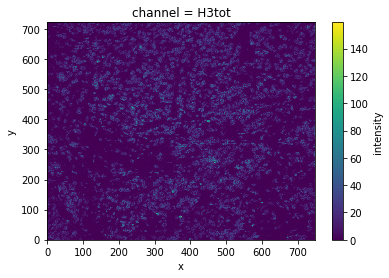

In [2]:
h3tot_img = intensity.loc['H3tot']  # no need to know the channel index

h3tot_img.plot()
plt.show()

Note: the [xtiff](https://github.com/BodenmillerGroup/xtiff) package for writing OME-TIFF supports `xarray` images.

# Summary

Recap:
1. Python basics
2. Numpy, matplotlib
3. Pandas, image processing
4. Image processing, editors
5. Object-oriented programming, exception handling
6. Package management, project organization, code style

Future sessions will be shorter (~30 mins) & irregular (announced via Mattermost)  
Upcoming sessions: plotting packages revisited, machine learning using scikit-learn

Questions, feedback and suggestions are welcome anytime.

Thank you for joining and happy coding!